# Data Loading

In [46]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
df = pd.read_csv(r"E:\ML PROJECTS\Spam_Detection\spam.csv", encoding='latin1')

In [48]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [49]:
df.shape

(5572, 5)

# Data Visualization

In [50]:
label_counts = df['v1'].value_counts()

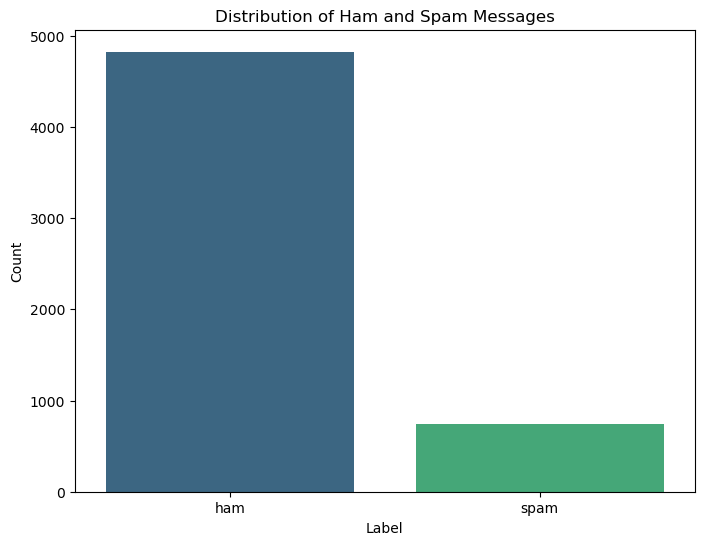

In [51]:
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Ham and Spam Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [52]:
ham_count = label_counts['ham']
spam_count = label_counts['spam']

In [53]:
ham_count

4825

In [54]:
spam_count

747

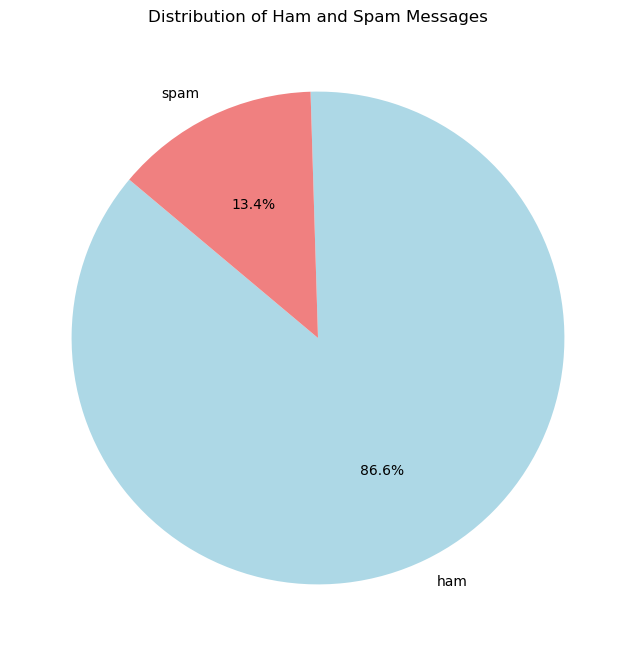

In [55]:
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Ham and Spam Messages')
plt.show()

# Data PreProcessing

In [56]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [57]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [58]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [59]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Lowercasing

In [60]:
# Remove any leading/trailing whitespace and convert text to lowercase
df['v2'] = df['v2'].str.strip().str.lower()

# Drop rows with missing values in 'Message' column
df.dropna(subset=['v2'], inplace=True)


## Tokenization

In [61]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df['Tokens'] = df['v2'].apply(word_tokenize)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\naras\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [62]:
df.head()

,v1,v2,Tokens
0,ham,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,..."


## Removing stopwords

In [63]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['Tokens'] = df['Tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naras\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
df['Tokens']

0       [go, jurong, point, ,, crazy, .., available, b...
1                [ok, lar, ..., joking, wif, u, oni, ...]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3       [u, dun, say, early, hor, ..., u, c, already, ...
4       [nah, n't, think, goes, usf, ,, lives, around,...
                              ...                        
5567    [2nd, time, tried, 2, contact, u., u, å£750, p...
5568               [ì_, b, going, esplanade, fr, home, ?]
5569           [pity, ,, *, mood, ., ..., suggestions, ?]
5570    [guy, bitching, acted, like, 'd, interested, b...
5571                                [rofl, ., true, name]
Name: Tokens, Length: 5572, dtype: object

In [65]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

df['Tokens'] = df['Tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])


## Bag of words

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

# Join tokens back into a string for CountVectorizer
df['Processed_Message'] = df['Tokens'].apply(lambda tokens: ' '.join(tokens))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Processed_Message'])

# Convert the labels to binary
y = df['v1'].apply(lambda x: 1 if x == 'spam' else 0)


## TF-IDF

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['Processed_Message'])

# Convert the labels to binary
Y = df['v1'].apply(lambda x: 1 if x == 'spam' else 0)


## Splitting Data

In [68]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (4457, 7377)
Testing set size: (1115, 7377)


## Model Implementation

In [70]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)


MultinomialNB()

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [72]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.967713004484305
Precision: 1.0
Recall: 0.76
F1 Score: 0.8636363636363636


In [73]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Confusion Matrix:
[[965   0]
 [ 36 114]]


In [74]:
# Testing
new_messages = ["Congratulations! You've won a free ticket to the Bahamas!", "Hey, how are you doing today?"]

# Preprocessing
new_messages_processed = [tfidf_vectorizer.transform([message.lower().strip()]) for message in new_messages]

# Predict the labels
predictions = [model.predict(message)[0] for message in new_messages_processed]


In [75]:
# Interpret the results
predicted_labels = ['spam' if label == 1 else 'ham' for label in predictions]
print(f"Predicted labels for new messages: {predicted_labels}")

Predicted labels for new messages: ['ham', 'ham']


## Pickling

In [76]:
import pickle

# Save the trained model as a pickle file
with open('spam_classifier_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer as a pickle file
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

print("Model and vectorizer have been saved to pickle files.")

Model and vectorizer have been saved to pickle files.


In [77]:
# Testing
new_messages = [
    "Hey, how's it going? Are we still meeting tonight?",
    "Reminder: Your appointment is tomorrow at 10 AM.",
    "FreeMsg Why haven't you replied to my text? I'm Randy, sexy, female and live local. Luv to hear from u. Netcollex Ltd 08700621170150p per msg reply Stop to end"
]


# Preprocessing
new_messages_processed = [tfidf_vectorizer.transform([message.lower().strip()]) for message in new_messages]

# Predict the labels
predictions = [model.predict(message)[0] for message in new_messages_processed]
# Interpret the results
predicted_labels = ['spam' if label == 1 else 'ham' for label in predictions]
print(f"Predicted labels for new messages: {predicted_labels}")

Predicted labels for new messages: ['ham', 'ham', 'spam']
